<a href="https://colab.research.google.com/github/ccbeltran/SeriesDeTiempo/blob/main/Proyecto_ST_SARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Variable de temperatura maxima en la ciudad de Cali entre el 2014 y 2019



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
# Leer el archivo Excel omitiendo la columna de aprobación
df_tempMax = pd.read_excel(
    '/content/drive/MyDrive/Series de tiempo/Temp_Max_Cali.xlsx',
    usecols=[0, 2],  # Solo columnas 0 (Fecha) y 2 (Valor)
    names=['Fecha', 'tempMax']  # Nuevos nombres
)

# Convertir la columna Fecha a datetime
df_tempMax['Fecha'] = pd.to_datetime(df_tempMax['Fecha'])

In [4]:
df_tempMax.head()

,Fecha,tempMax
0,2014-01-02,30.2
1,2014-01-03,30.6
2,2014-01-04,30.8
3,2014-01-05,30.2
4,2014-01-06,28.8


In [5]:
# Create the plot
fig = px.line(df_tempMax, x='Fecha', y='tempMax', title='Temperatura Máxima en Cali (2014-2019)')

# Customize the plot (optional)
fig.update_xaxes(title_text='Fecha')
fig.update_yaxes(title_text='Temperatura Máxima (°C)')

# Show the plot
fig.show()


In [6]:
# Establecer la fecha como índice
df_tempMax.set_index('Fecha', inplace=True)

In [7]:
# Crear rango completo de fechas
rango_fechas = pd.date_range(start='2014-01-01', end='2019-12-31', freq='D')


# Resetear índice si se necesita como columna
df_tempMax = df_tempMax.reset_index(names='Fecha')

In [8]:
df_tempMax.head()

,Fecha,tempMax
0,2014-01-02,30.2
1,2014-01-03,30.6
2,2014-01-04,30.8
3,2014-01-05,30.2
4,2014-01-06,28.8


In [9]:
# Create the plot
fig = px.line(df_tempMax, x='Fecha', y='tempMax', title='Temperatura Máxima en Cali (2014-2019)')

# Customize the plot (optional)
fig.update_xaxes(title_text='Fecha')
fig.update_yaxes(title_text='Temperatura Máxima (°C)')

# Show the plot
fig.show()

In [10]:
fechas_presentes = df_tempMax['Fecha'].unique()
fechas_faltantes = rango_fechas.difference(fechas_presentes)

In [11]:
print("Fechas faltantes:", fechas_faltantes)
print("Número de fechas faltantes:", len(fechas_faltantes))

Fechas faltantes: DatetimeIndex(['2014-01-01', '2014-05-02', '2014-06-30', '2014-10-01',
               '2014-10-02', '2014-10-03', '2014-10-04', '2014-10-05',
               '2014-10-06', '2014-10-07',
               ...
               '2019-12-07', '2019-12-08', '2019-12-10', '2019-12-15',
               '2019-12-16', '2019-12-17', '2019-12-23', '2019-12-26',
               '2019-12-27', '2019-12-29'],
              dtype='datetime64[ns]', length=405, freq=None)
Número de fechas faltantes: 405


In [12]:
# Calcular la media de la temperatura máxima (ignorando nulos)
media_temp = df_tempMax['tempMax'].mean()

# Crear un DataFrame con las fechas faltantes e imputar con la media
df_imputado = pd.DataFrame({
    'Fecha': fechas_faltantes,
    'tempMax': media_temp
})

# Unir los dos DataFrames
df_max = pd.concat([df_tempMax, df_imputado], ignore_index=True)

# Ordenar por fecha (opcional pero recomendado)
df_max = df_max.sort_values('Fecha').reset_index(drop=True)

In [13]:
print("Media de temp_max:", media_temp)

Media de temp_max: 31.1048712206047


In [14]:
df_imputado.head()

,Fecha,tempMax
0,2014-01-01,31.104871
1,2014-05-02,31.104871
2,2014-06-30,31.104871
3,2014-10-01,31.104871
4,2014-10-02,31.104871


In [15]:
# Create the plot
fig = px.line(df_max, x='Fecha', y='tempMax', title='Temperatura Máxima en Cali (2014-2019)')

# Customize the plot (optional)
fig.update_xaxes(title_text='Fecha')
fig.update_yaxes(title_text='Temperatura Máxima (°C)')

# Show the plot
fig.show()

#Variable de temperatura minima en la ciudad de Cali entre el 2014 y 2019

In [16]:
# Leer el archivo Excel omitiendo la columna de aprobación
df_tempMin = pd.read_excel(
    '/content/drive/MyDrive/Series de tiempo/Temperatura minima.xlsx',
    sheet_name='Datos',
    skiprows=8,
    usecols=[0, 2],  # Solo columnas 0 (Fecha) y 2 (Valor)
    names=['Fecha', 'tempMin']  # Nuevos nombres
)

# Convertir la columna Fecha a datetime
df_tempMin['Fecha'] = pd.to_datetime(df_tempMin['Fecha'])

In [17]:
# Create the plot
fig = px.line(df_tempMin, x='Fecha', y='tempMin', title='Temperatura Mínima en Cali (2014-2019)')

# Customize the plot (optional)
fig.update_xaxes(title_text='Fecha')
fig.update_yaxes(title_text='Temperatura Mínima (°C)')

# Show the plot
fig.show()

In [18]:
# Crear rango completo de fechas
rango_fechas = pd.date_range(start='2014-01-01', end='2019-12-31', freq='D')

#Temperatura promedio de la maxima y minima

In [19]:
fechas_presentes_min = df_tempMin['Fecha'].unique()
fechas_faltantes_min= rango_fechas.difference(fechas_presentes_min)

In [20]:
print("Fechas faltantes:", fechas_faltantes_min)
print("Número de fechas faltantes:", len(fechas_faltantes_min))

Fechas faltantes: DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-05-02', '2014-05-03',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=259, freq=None)
Número de fechas faltantes: 259


In [21]:
# Calcular la media de la temperatura máxima (ignorando nulos)
media_temp_min = df_tempMin['tempMin'].mean()

# Crear un DataFrame con las fechas faltantes e imputar con la media
df_imputado_min = pd.DataFrame({
    'Fecha': fechas_faltantes,
    'tempMin': media_temp_min
})

# Unir los dos DataFrames
df_min = pd.concat([df_tempMin, df_imputado_min], ignore_index=True)

# Ordenar por fecha (opcional pero recomendado)
df_min= df_min.sort_values('Fecha').reset_index(drop=True)

In [22]:
print("Media de temp_max:", media_temp_min)

Media de temp_max: 19.72567287784679


In [23]:
df_min.head()

,Fecha,tempMin
0,2014-01-01,19.725673
1,2014-01-09,20.600000
2,2014-01-10,19.800000
3,2014-01-11,20.400000
4,2014-01-12,19.800000


In [24]:
# Create the plot
fig = px.line(df_min, x='Fecha', y='tempMin', title='Temperatura Minima en Cali (2014-2019)')

# Customize the plot (optional)
fig.update_xaxes(title_text='Fecha')
fig.update_yaxes(title_text='Temperatura Minima (°C)')

# Show the plot
fig.show()

In [25]:
df_temp = pd.merge(df_max, df_min, on='Fecha')
df_temp

,Fecha,tempMax,tempMin
0,2014-01-01,31.104871,19.725673
1,2014-01-09,28.200000,20.600000
2,2014-01-10,27.000000,19.800000
3,2014-01-11,27.800000,20.400000
4,2014-01-12,28.600000,19.800000
...,...,...,...
2332,2019-12-17,31.104871,19.725673
2333,2019-12-23,31.104871,19.725673
2334,2019-12-26,31.104871,19.725673
2335,2019-12-27,31.104871,19.725673


In [26]:
### Crear el dataset con la temperatura maxima y minima y hallar el promedio
df_temp['tempPromedio'] = (df_temp['tempMax'] + df_temp['tempMin']) / 2
df_temp

,Fecha,tempMax,tempMin,tempPromedio
0,2014-01-01,31.104871,19.725673,25.415272
1,2014-01-09,28.200000,20.600000,24.400000
2,2014-01-10,27.000000,19.800000,23.400000
3,2014-01-11,27.800000,20.400000,24.100000
4,2014-01-12,28.600000,19.800000,24.200000
...,...,...,...,...
2332,2019-12-17,31.104871,19.725673,25.415272
2333,2019-12-23,31.104871,19.725673,25.415272
2334,2019-12-26,31.104871,19.725673,25.415272
2335,2019-12-27,31.104871,19.725673,25.415272


In [27]:
df_temp['Fecha'] = pd.to_datetime(df_temp['Fecha'])
df_temp = df_temp.set_index('Fecha')

In [28]:
semanal = df_temp.resample('W-MON')['tempPromedio'].mean().reset_index()
semanal

,Fecha,tempPromedio
0,2014-01-06,25.415272
1,2014-01-13,24.320000
2,2014-01-20,25.071429
3,2014-01-27,24.871429
4,2014-02-03,24.757143
...,...,...
308,2019-12-02,25.415272
309,2019-12-09,25.415272
310,2019-12-16,25.415272
311,2019-12-23,25.415272


In [29]:
graficar = px.line(semanal, x='Fecha', y='tempPromedio', title='Temperatura Promedio Mensual')
graficar.show()

In [30]:
#Consolidar el dataframe
## Lectura de la base de datos
url = '/content/drive/MyDrive/Series de tiempo/BaseCali_Final.xlsx'
series = pd.read_excel(url)

print(series.head())

    Año  SE   Casos  Precipitacion
0  2014    1    169           0.25
1  2014    2    176         108.50
2  2014    3    141           0.75
3  2014    4    138          13.20
4  2014    5    123          36.35


In [31]:
print(f"Total de semanas: {len(semanal)}")
print(f"Total de semanas: {len(series)}")
print("\nPrimeras 10 semanas:")
print(semanal.tail(10))

Total de semanas: 313
Total de semanas: 312

Primeras 10 semanas:
         Fecha  tempPromedio
303 2019-10-28     25.714286
304 2019-11-04     25.625000
305 2019-11-11     25.568921
306 2019-11-18     25.415272
307 2019-11-25     25.415272
308 2019-12-02     25.415272
309 2019-12-09     25.415272
310 2019-12-16     25.415272
311 2019-12-23     25.415272
312 2019-12-30     25.415272


In [32]:
#Renombrar la columna Año en el dataset series
series.rename(columns={'Año': 'Fecha'}, inplace=True)

In [33]:
series.rename(columns={'SE ': 'SE'}, inplace=True)

In [34]:
series.columns

Index(['Fecha', 'SE', 'Casos', 'Precipitacion'], dtype='object')

In [35]:
# Convertir 'Fecha' y 'SE' de series1 en una fecha completa (inicio de semana)
series['Fecha'] = pd.to_datetime(series['Fecha'].astype(str) + '-W' + series['SE'].astype(str) + '-1', format='%Y-W%W-%w')

In [36]:
semanal['Fecha'] = pd.to_datetime(semanal['Fecha'])

In [37]:
# Filtrar series1 para que solo tenga fechas dentro del rango de semanal
fecha_min = semanal['Fecha'].min()
fecha_max = semanal['Fecha'].max()
series = series[(series['Fecha'] >= fecha_min) & (series['Fecha'] <= fecha_max)]

In [38]:
#Unir ambos DataFrames por la columna 'Fecha'
df = pd.merge(semanal, series, on='Fecha', how='inner')

In [39]:
df.head()

,Fecha,tempPromedio,SE,Casos,Precipitacion
0,2014-01-06,25.415272,1,169,0.25
1,2014-01-13,24.320000,2,176,108.50
2,2014-01-20,25.071429,3,141,0.75
3,2014-01-27,24.871429,4,138,13.20
4,2014-02-03,24.757143,5,123,36.35


In [40]:
fig = go.Figure()

# Agregar cada línea por separado
fig.add_trace(go.Scatter(x=df['Fecha'], y=df['tempPromedio'],
                         mode='lines', name='Temperatura Promedio'))
fig.add_trace(go.Scatter(x=df['Fecha'], y=df['Precipitacion'],
                         mode='lines', name='Precipitación'))
fig.add_trace(go.Scatter(x=df['Fecha'], y=df['Casos'],
                         mode='lines', name='Casos'))

# Título y ejes
fig.update_layout(
    title='Series de Tiempo: Temperatura, Precipitación y Casos',
    title_font=dict(size=20, family='Arial', color='black'),
    xaxis_title='Fecha',
    yaxis_title='Valor',
    legend_title='Variable'
)

fig.show()


In [41]:
# Crear subplots: 3 filas, 1 columna, compartiendo eje X
fig = make_subplots(rows=3, cols=1, shared_xaxes=True,
                    subplot_titles=('Temperatura Promedio', 'Precipitación', 'Casos'))

# Temperatura
fig.add_trace(go.Scatter(x=df['Fecha'], y=df['tempPromedio'],
                         mode='lines', name='Temperatura',
                         line=dict(color='orange')), row=1, col=1)

# Precipitación
fig.add_trace(go.Scatter(x=df['Fecha'], y=df['Precipitacion'],
                         mode='lines', name='Precipitación',
                         line=dict(color='blue')), row=2, col=1)

# Casos
fig.add_trace(go.Scatter(x=df['Fecha'], y=df['Casos'],
                         mode='lines', name='Casos',
                         line=dict(color='red')), row=3, col=1)

# Layout general
fig.update_layout(
    height=800,
    title_text='Series de Tiempo en Subgráficas: Temperatura, Precipitación y Casos',
    title_font=dict(size=20, family='Arial', color='black'),
    showlegend=False
)

# Etiquetas de ejes
fig.update_yaxes(title_text='Temp (°C)', row=1, col=1)
fig.update_yaxes(title_text='Precipitación (mm)', row=2, col=1)
fig.update_yaxes(title_text='Casos', row=3, col=1)
fig.update_xaxes(title_text='Fecha', row=3, col=1)

fig.show()


#Modelos a trabajar
1. Suavizado exponencial Holt Winters (Karen)
2. SARIMAX (Cami)
3. Prophet (Angela)
4. Random Forest (Migue)

In [43]:
df = df.interpolate()

# Revisar estructura
df.head()

,Fecha,tempPromedio,SE,Casos,Precipitacion
0,2014-01-06,25.415272,1,169,0.25
1,2014-01-13,24.320000,2,176,108.50
2,2014-01-20,25.071429,3,141,0.75
3,2014-01-27,24.871429,4,138,13.20
4,2014-02-03,24.757143,5,123,36.35


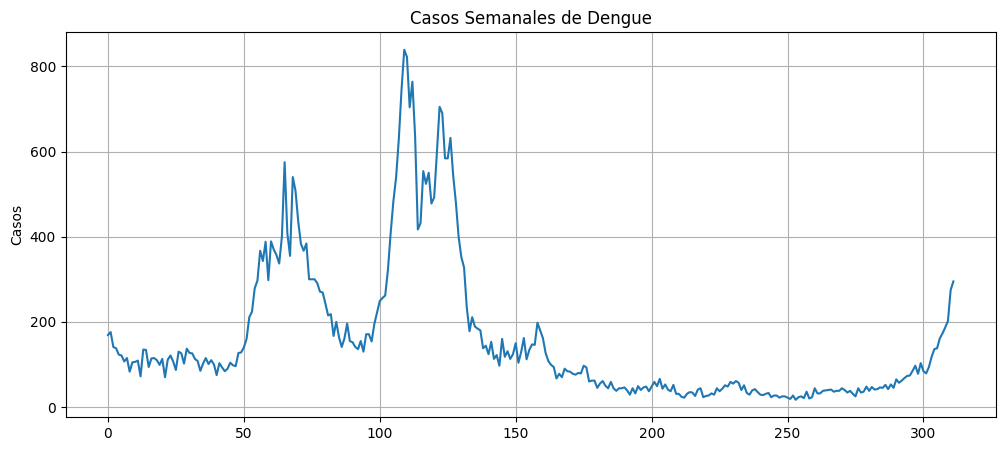

In [44]:
import matplotlib.pyplot as plt

df['Casos'].plot(figsize=(12, 5), title='Casos Semanales de Dengue')
plt.ylabel("Casos")
plt.grid()
plt.show()

In [45]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Modelo SARIMA simple
model_sarima = SARIMAX(df['Casos'],
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 52),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

results_sarima = model_sarima.fit()
print(results_sarima.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Casos   No. Observations:                  312
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood               -1057.553
Date:                            Sat, 24 May 2025   AIC                           2125.105
Time:                                    13:13:01   BIC                           2141.721
Sample:                                         0   HQIC                          2131.826
                                            - 312                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9669      0.063     15.456      0.000       0.844       1.090
ma.L1         -0.9634      0.080   

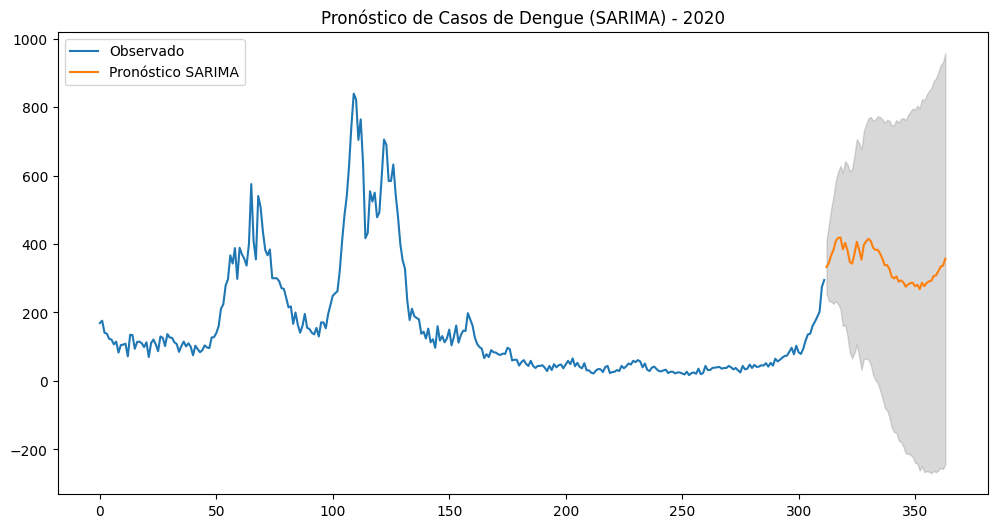

In [46]:
forecast_sarima = results_sarima.get_forecast(steps=52)
forecast_ci = forecast_sarima.conf_int()

ax = df['Casos'].plot(label='Observado', figsize=(12, 6))
forecast_sarima.predicted_mean.plot(ax=ax, label='Pronóstico SARIMA')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='gray', alpha=0.3)
ax.set_title('Pronóstico de Casos de Dengue (SARIMA) - 2020')
ax.legend()
plt.show()

In [47]:
# Variables exógenas
exog = df[['tempPromedio', 'Precipitacion']]

# Modelo SARIMAX
model_sarimax = SARIMAX(df['Casos'],
                        exog=exog,
                        order=(1, 1, 1),
                        seasonal_order=(1, 1, 1, 52),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

results_sarimax = model_sarimax.fit()
print(results_sarimax.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Casos   No. Observations:                  312
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood               -1051.339
Date:                            Sat, 24 May 2025   AIC                           2116.678
Time:                                    13:13:35   BIC                           2139.939
Sample:                                         0   HQIC                          2126.086
                                            - 312                                         
Covariance Type:                              opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
tempPromedio      2.6759      3.055      0.876      0.381      -3.312       8.664
Precipitacion    -0.0208  

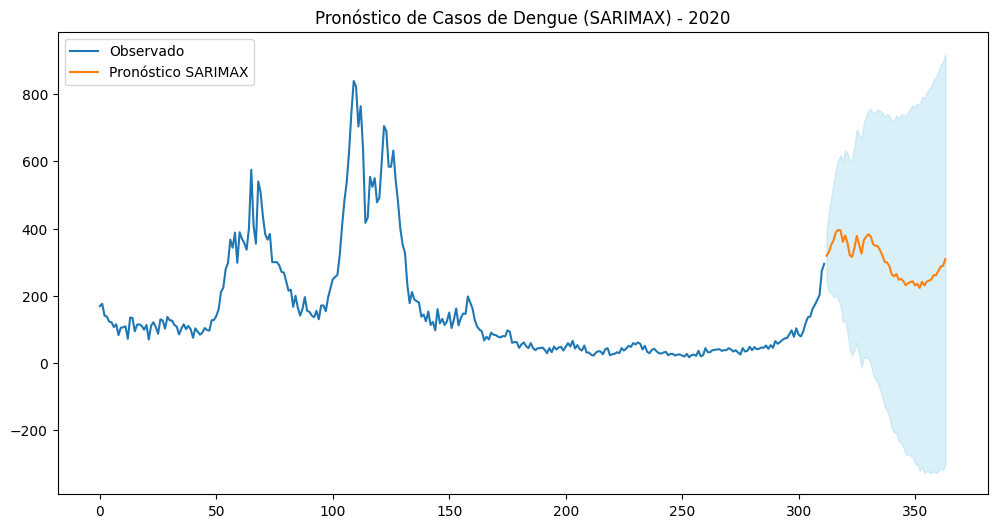

In [48]:
# Generar fechas para 2020
future_index = pd.date_range(start='2020-01-06', periods=52, freq='W-MON')

# Crear DataFrame con promedios
exog_future = pd.DataFrame({
    'tempPromedio': [df['tempPromedio'].mean()] * 52,
    'Precipitacion': [df['Precipitacion'].mean()] * 52
}, index=future_index)

# Hacer pronóstico
forecast_sarimax = results_sarimax.get_forecast(steps=52, exog=exog_future)
forecast_ci = forecast_sarimax.conf_int()

# Graficar
ax = df['Casos'].plot(label='Observado', figsize=(12, 6))
forecast_sarimax.predicted_mean.plot(ax=ax, label='Pronóstico SARIMAX')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='skyblue', alpha=0.3)
ax.set_title('Pronóstico de Casos de Dengue (SARIMAX) - 2020')
ax.legend()
plt.show()

In [49]:
#SARIMAX sin estacionalidad
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Crear modelo SARIMAX sin parte estacional
model_sarimax_simple = SARIMAX(df['Casos'],
                               exog=df[['tempPromedio', 'Precipitacion']],
                               order=(1, 1, 1),  # sin seasonal_order
                               enforce_stationarity=False,
                               enforce_invertibility=False)

results_sarimax_simple = model_sarimax_simple.fit()
print(results_sarimax_simple.summary())

                               SARIMAX Results                                
Dep. Variable:                  Casos   No. Observations:                  312
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1562.797
Date:                Sat, 24 May 2025   AIC                           3135.593
Time:                        13:13:35   BIC                           3154.260
Sample:                             0   HQIC                          3143.056
                                - 312                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
tempPromedio      2.4019      3.720      0.646      0.518      -4.888       9.692
Precipitacion    -0.0942      0.060     -1.580      0.114      -0.211       0.023
ar.L1            -0.7653      0.070    -

In [50]:
# Crear fechas para 2020
future_index = pd.date_range(start='2020-01-06', periods=52, freq='W-MON')

# Crear DataFrame con valores promedio
exog_future_simple = pd.DataFrame({
    'tempPromedio': [df['tempPromedio'].mean()] * 52,
    'Precipitacion': [df['Precipitacion'].mean()] * 52
}, index=future_index)

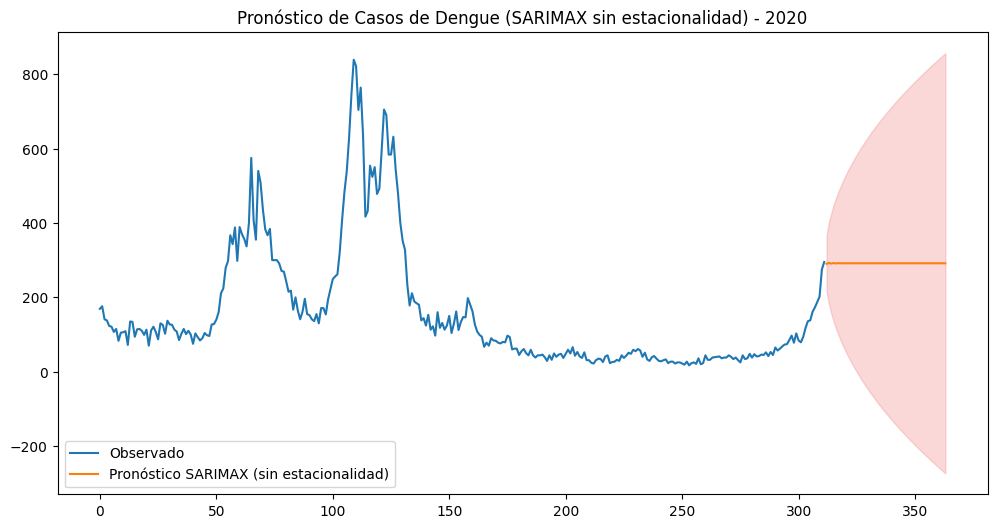

In [51]:
forecast_simple = results_sarimax_simple.get_forecast(steps=52, exog=exog_future_simple)
ci_simple = forecast_simple.conf_int()

# Graficar
import matplotlib.pyplot as plt

ax = df['Casos'].plot(label='Observado', figsize=(12, 6))
forecast_simple.predicted_mean.plot(ax=ax, label='Pronóstico SARIMAX (sin estacionalidad)')
ax.fill_between(ci_simple.index,
                ci_simple.iloc[:, 0],
                ci_simple.iloc[:, 1], color='lightcoral', alpha=0.3)
ax.set_title('Pronóstico de Casos de Dengue (SARIMAX sin estacionalidad) - 2020')
ax.legend()
plt.show()

In [52]:
# AIC y BIC del modelo
aic_1 = results_sarimax.aic
bic_1 = results_sarimax.bic

# Modelo sin estacionalidad
model_sarimax_simple = SARIMAX(df['Casos'],
                                exog=df[['tempPromedio', 'Precipitacion']],
                                order=(1, 1, 1),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_sarimax_simple = model_sarimax_simple.fit()

aic_2 = results_sarimax_simple.aic
bic_2 = results_sarimax_simple.bic

# Mostrar comparación
print("=== COMPARACIÓN AIC / BIC ===")
print(f"Modelo COMPLETO (SARIMAX estacional):     AIC = {aic_1:.2f}, BIC = {bic_1:.2f}")
print(f"Modelo SIMPLE  (SARIMAX sin estacional):  AIC = {aic_2:.2f}, BIC = {bic_2:.2f}")

=== COMPARACIÓN AIC / BIC ===
Modelo COMPLETO (SARIMAX estacional):     AIC = 2116.68, BIC = 2139.94
Modelo SIMPLE  (SARIMAX sin estacional):  AIC = 3135.59, BIC = 3154.26


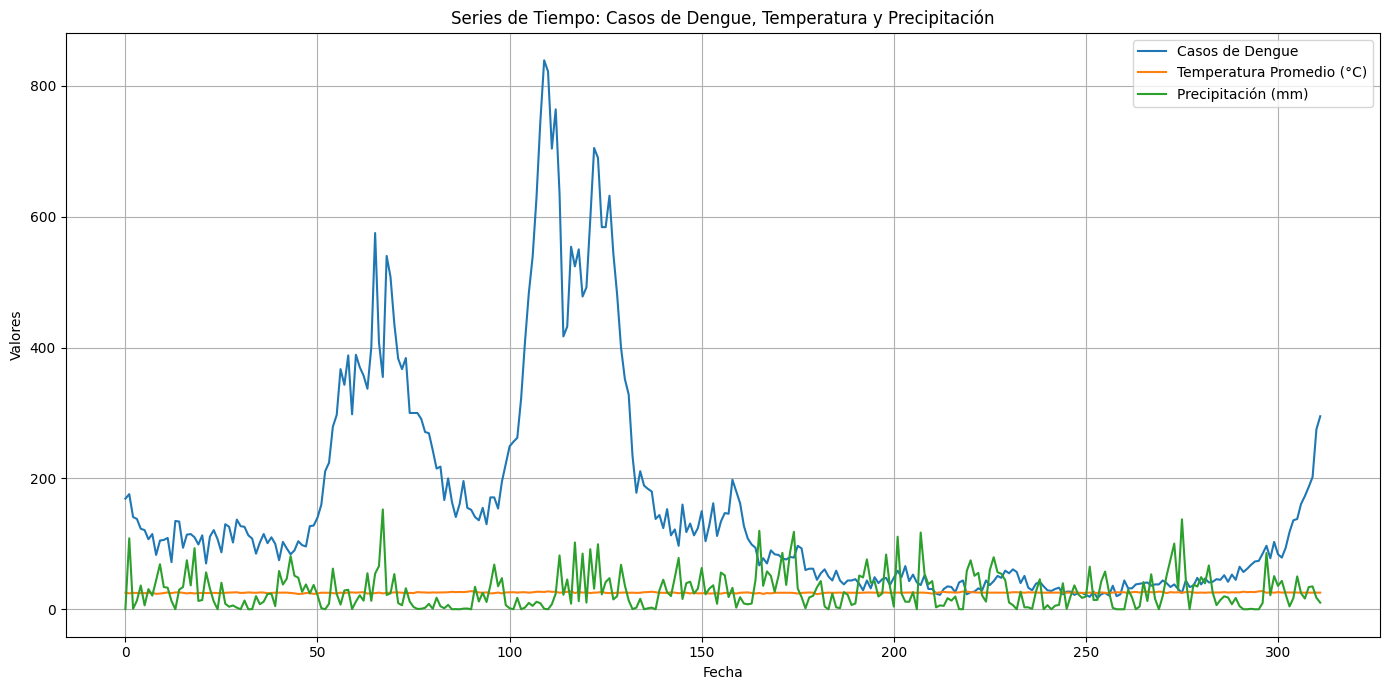

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

variables_a_graficar = ['Casos', 'tempPromedio', 'Precipitacion']

# Crear el gráfico de series de tiempo multivariadas
plt.figure(figsize=(14, 7))

for var in variables_a_graficar:
    plt.plot(df.index, df[var], label=var)

# Etiquetas y detalles
plt.title('Series de Tiempo: Casos de Dengue, Temperatura y Precipitación')
plt.xlabel('Fecha')
plt.ylabel('Valores')
plt.legend(['Casos de Dengue', 'Temperatura Promedio (°C)', 'Precipitación (mm)'])
plt.grid(True)
plt.tight_layout()
plt.show()

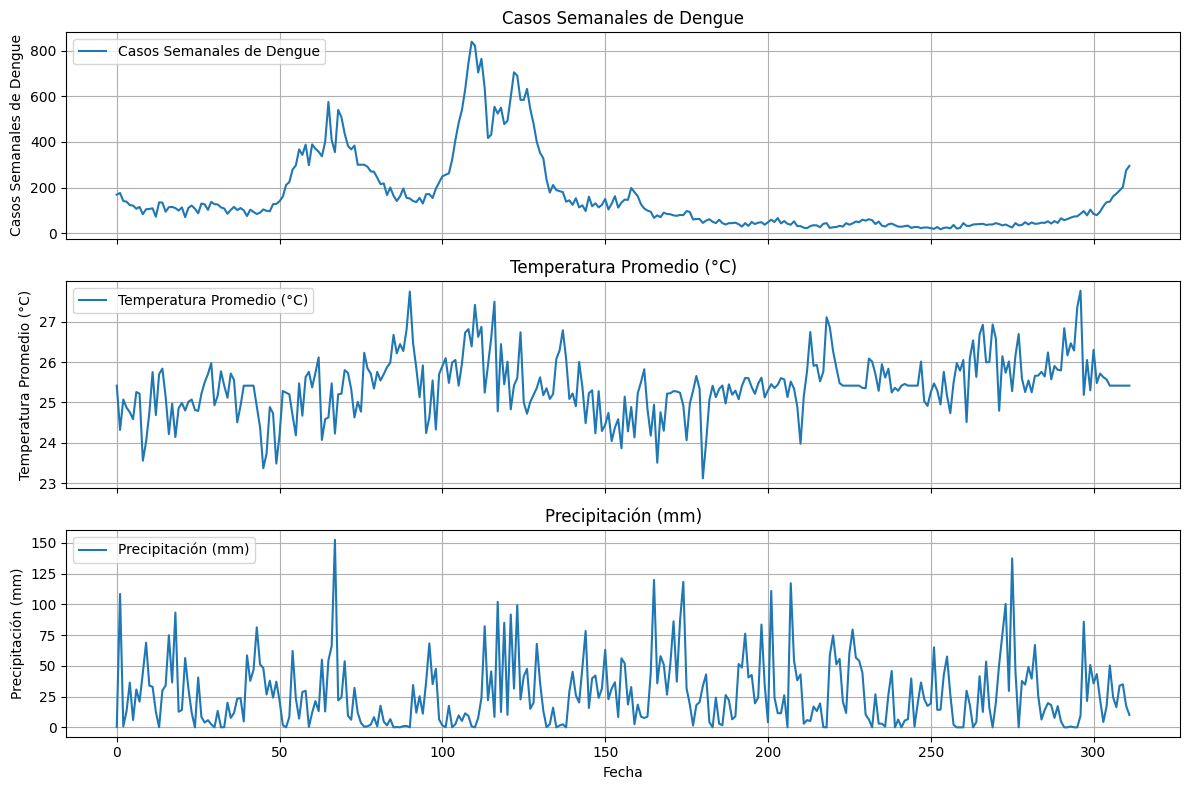

In [54]:
import matplotlib.pyplot as plt

# Variables y títulos personalizados
variables_diff_units = ['Casos', 'tempPromedio', 'Precipitacion']
titles = ['Casos Semanales de Dengue', 'Temperatura Promedio (°C)', 'Precipitación (mm)']

# Crear subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8), sharex=True)

# Graficar cada variable en su propio eje
for i, var in enumerate(variables_diff_units):
    axes[i].plot(df.index, df[var], label=titles[i], color='tab:blue')
    axes[i].set_title(titles[i])
    axes[i].set_ylabel(titles[i])
    axes[i].grid(True)
    axes[i].legend(loc='upper left')

# Etiqueta del eje X común
plt.xlabel('Fecha')
plt.tight_layout()
plt.show()

In [55]:
!pip install hvplot
!pip install arch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from arch.unitroot import PhillipsPerron
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import jarque_bera
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.gofplots import qqplot
from statsmodels.sandbox.stats.runs import runstest_1samp

import hvplot.pandas

import warnings
warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.3/170.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 20.4 MB/s eta 0:00:00


In [56]:
df=df.iloc[0:7,]
df

,Fecha,tempPromedio,SE,Casos,Precipitacion
0,2014-01-06,25.415272,1,169,0.25
1,2014-01-13,24.320000,2,176,108.50
2,2014-01-20,25.071429,3,141,0.75
3,2014-01-27,24.871429,4,138,13.20
4,2014-02-03,24.757143,5,123,36.35
5,2014-02-10,24.585714,6,121,5.95
6,2014-02-17,25.257143,7,107,30.80


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          7 non-null      datetime64[ns]
 1   tempPromedio   7 non-null      float64       
 2   SE             7 non-null      int64         
 3   Casos          7 non-null      int64         
 4   Precipitacion  7 non-null      float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 412.0 bytes


In [58]:
z1=pd.DataFrame(df["Casos"])

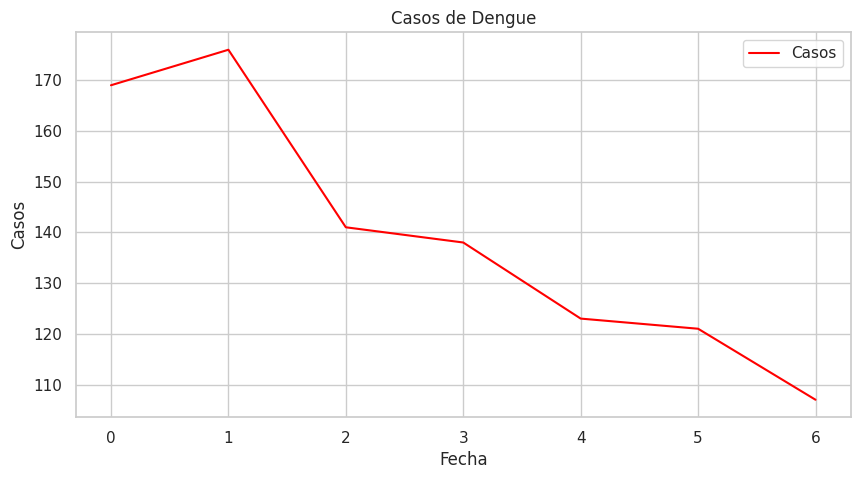

In [59]:
sns.set_theme(style="whitegrid")
# Graficar la serie original
plt.figure(figsize=(10,5))
plt.plot(z1, color="red", label="Casos")
plt.title("Casos de Dengue")
plt.xlabel("Fecha")
plt.ylabel("Casos")
plt.legend()
plt.grid(True)
plt.show()

In [60]:
z1["Casos"].hvplot()

:Curve   [index]   (Casos)